In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Import data
df_athlete = pd.read_csv('dataset/athlete_events.csv')
df_country = pd.read_csv('dataset/country_definitions.csv')

In [4]:
df_athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
df_country.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [6]:
df_athlete.shape

(271116, 15)

In [7]:
df_athlete.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [8]:
df_athlete.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

<AxesSubplot:ylabel='Frequency'>

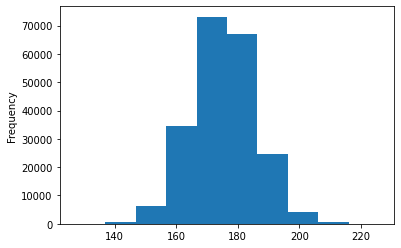

In [9]:
# Method test
df_athlete.Height.plot(kind='hist')

In [10]:
# Method test
df_athlete.groupby('Games').Weight.agg(['count', 'median']).sort_values('median').sample(5)

,count,median
Games,,
1906 Summer,205,77.0
2008 Summer,13443,70.0
1908 Summer,483,75.0
1988 Summer,11730,70.0
1924 Winter,41,70.0


In [23]:
# Method test
df_athlete[pd.DataFrame([df_athlete.Age.isna(), df_athlete.Year >= 2000]).all()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Bronze,Gold,Silver
37945,19504,Cha Yong-Hwa,F,NaN,145.0,39.0,North Korea,PRK,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Individual All-Around,0,0,0
37946,19504,Cha Yong-Hwa,F,NaN,145.0,39.0,North Korea,PRK,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Uneven Bars,0,0,0
162719,81706,Moosaka,F,NaN,NaN,NaN,Uganda,UGA,2000 Summer,2000,Summer,Sydney,Table Tennis,Table Tennis Women's Singles,0,0,0


In [11]:
# Method test
df_athlete.Year.value_counts()

1992    16413
1988    14676
2000    13821
1996    13780
2016    13688
2008    13602
2004    13443
2012    12920
1972    11959
1984    11588
1976    10502
1968    10479
1964     9480
1952     9358
1960     9235
1980     8937
1948     7480
1936     7401
1956     6434
1924     5693
1928     5574
2014     4891
2010     4402
2006     4382
1920     4292
2002     4109
1912     4040
1998     3605
1932     3321
1994     3160
1908     3101
1900     1936
1906     1733
1904     1301
1896      380
Name: Year, dtype: int64

<AxesSubplot:>

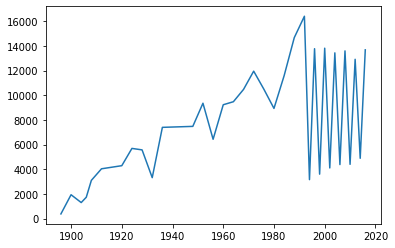

In [12]:
# Study the number of athletes each year
df_athlete.Year.value_counts().sort_index().plot()

In [13]:
df_athlete.Season.describe()

count     271116
unique         2
top       Summer
freq      222552
Name: Season, dtype: object

In [14]:
df_athlete.Season.unique()

array(['Summer', 'Winter'], dtype=object)

<AxesSubplot:>

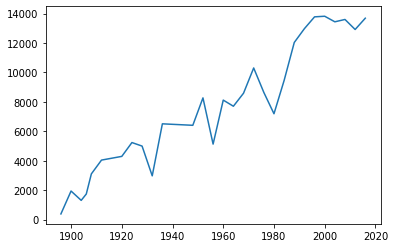

In [15]:
df_athlete[df_athlete.Season == 'Summer'].Year.value_counts().sort_index().plot()

<AxesSubplot:>

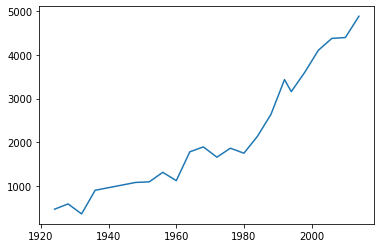

In [16]:
df_athlete[df_athlete.Season == 'Winter'].Year.value_counts().sort_index().plot()

In [17]:
len(df_athlete.Year.unique())

35

In [18]:
df_athlete.Games.describe()

count          271116
unique             51
top       2000 Summer
freq            13821
Name: Games, dtype: object

In [19]:
df_athlete.Sport.describe()

count        271116
unique           66
top       Athletics
freq          38624
Name: Sport, dtype: object

In [20]:
df_athlete.drop_duplicates('Games').sort_values('Year')[['Games', 'Year']]

,Games,Year
3079,1896 Summer,1896
3,1900 Summer,1900
711,1904 Summer,1904
268,1906 Summer,1906
1149,1908 Summer,1908
35,1912 Summer,1912
2,1920 Summer,1920
672,1924 Winter,1924
39,1924 Summer,1924
935,1928 Winter,1928


In [21]:
# Study number of awarded medals each year
# Change medal column to categorical encoding
df_athlete = pd.concat([df_athlete, pd.get_dummies(df_athlete.Medal)], axis=1)
df_athlete.drop('Medal', axis=1, inplace=True)
df_athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0,0,0


In [25]:
df_athlete.groupby('Games').sum()[['Gold', 'Silver', 'Bronze']]

,Gold,Silver,Bronze
Games,,,
1896 Summer,62.0,43.0,38.0
1900 Summer,201.0,228.0,175.0
1904 Summer,173.0,163.0,150.0
1906 Summer,157.0,156.0,145.0
1908 Summer,294.0,281.0,256.0
1912 Summer,326.0,315.0,300.0
1920 Summer,493.0,448.0,367.0
1924 Summer,277.0,281.0,274.0
1924 Winter,55.0,38.0,37.0


In [26]:
# Study the sports with the most athletes
df_athlete.Sport.describe()

count        271116
unique           66
top       Athletics
freq          38624
Name: Sport, dtype: object

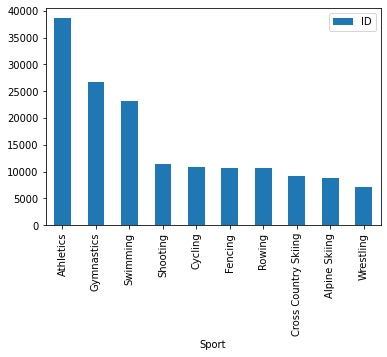

In [34]:
df_athlete.groupby('Sport').count()[['ID']].sort_values('ID', ascending=False).head(10).plot(kind='bar')
plt.show()

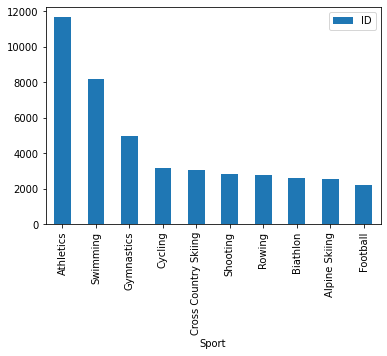

In [33]:
df_athlete[df_athlete.Year >= 2000].groupby('Sport').count()[['ID']].sort_values('ID', ascending=False).head(10).plot(kind='bar')
plt.show()

In [35]:
# Study the sports with the most awarded medals
df_sport = df_athlete.groupby('Sport').sum()[['Gold', 'Silver', 'Bronze']]
df_sport.head()

,Gold,Silver,Bronze
Sport,,,
Aeronautics,1.0,0.0,0.0
Alpine Skiing,143.0,144.0,141.0
Alpinism,25.0,0.0,0.0
Archery,135.0,120.0,98.0
Art Competitions,49.0,56.0,51.0
...,...,...,...
Tug-Of-War,43.0,43.0,29.0
Volleyball,322.0,322.0,325.0
Water Polo,350.0,347.0,360.0


In [38]:
df_sport['Total'] = df_sport.sum(axis=1)
df_sport.head()

,Gold,Silver,Bronze,Total
Sport,,,,
Aeronautics,1.0,0.0,0.0,1.0
Alpine Skiing,143.0,144.0,141.0,428.0
Alpinism,25.0,0.0,0.0,25.0
Archery,135.0,120.0,98.0,353.0
Art Competitions,49.0,56.0,51.0,156.0
...,...,...,...,...
Tug-Of-War,43.0,43.0,29.0,115.0
Volleyball,322.0,322.0,325.0,969.0
Water Polo,350.0,347.0,360.0,1057.0


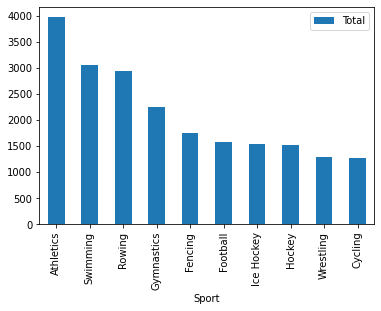

In [68]:
df_sport.sort_values('Total', ascending=False)[['Total']].head(10).plot(kind='bar')
plt.show()

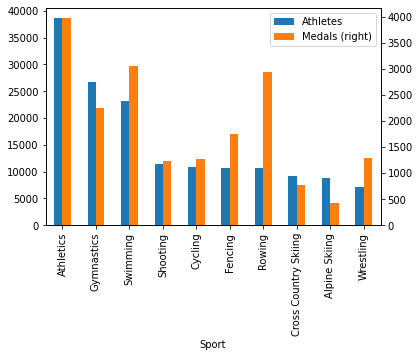

In [67]:
# Relating number of medals with number of athletes
num_athlete = df_athlete.groupby('Sport').count()['ID']
num_medal = df_sport['Total']
df = pd.DataFrame([num_athlete, num_medal]).transpose()
df.columns = ['Athletes', 'Medals']
df = df.dropna()

# https://stackoverflow.com/questions/24183101/pandas-bar-plot-with-two-bars-and-two-y-axis

df.sort_values('Athletes', ascending=False).head(10).plot(kind='bar', secondary_y='Medals')

plt.show()

In [58]:
df_athlete[df_athlete.Sport == 'Rowing'].count()

ID        10595
Name      10595
Sex       10595
Age       10069
Height     7920
Weight     7933
Team      10595
NOC       10595
Games     10595
Year      10595
Season    10595
City      10595
Sport     10595
Event     10595
Bronze    10595
Gold      10595
Silver    10595
dtype: int64

In [59]:
df_sport.loc['Rowing']

Gold       978.0
Silver     977.0
Bronze     990.0
Total     2945.0
Name: Rowing, dtype: float64